# Week 5 Notebook - Multilayered Perceptrons

## Multilayered Perceptrons for Regression

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.model_selection import train_test_split


np.random.seed = 47

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [3]:
# Implement your code here
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model 
model.add(Dense(output_dim=2, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid'))
model.add(Dense(output_dim=1, activation='linear'))

# Slightly better model.
# model.add(Dense(output_dim=4, input_shape=[X_train_scaled.shape[1]], 
#                 activation='relu'))
# model.add(Dense(output_dim=2, activation='sigmoid'))
# model.add(Dense(output_dim=1, activation='linear'))


# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)

Using TensorFlow backend.


C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=[1], activation="sigmoid", units=2)`
  if sys.path[0] == '':


C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  del sys.path[0]


In [4]:
# Fit the model
history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256,
          nb_epoch = 10000, verbose=0, validation_data=(X_test_scaled,y_test.reshape(-1,1)))

C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE Loss after final iteration:  3.4129962434566377


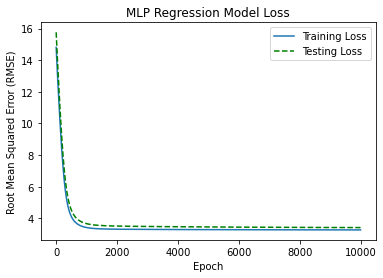

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1]))
plt.show()

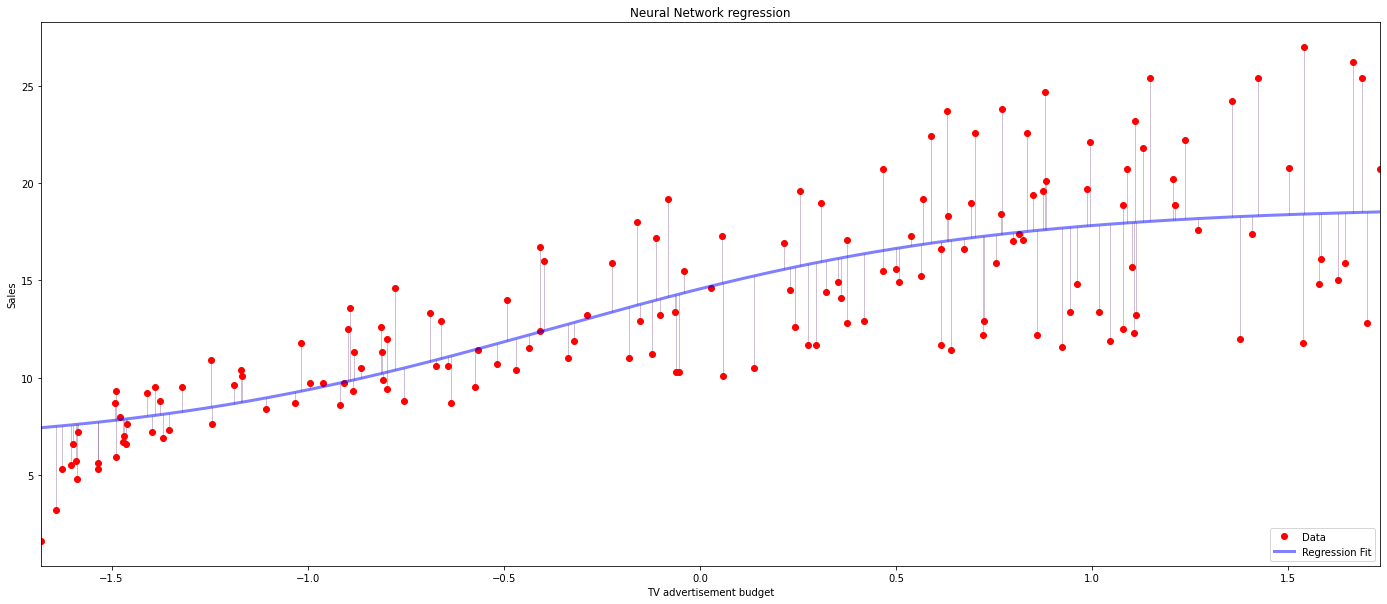

In [7]:
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network regression')

# plot the regression line
plt.show()

### KDD Cup 1999 Network Security Dataset

In this next example, we will look at the KDD Cup 1999 dataset. (10% subset)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
print("Targets: ", data['target'].unique())
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

data.head()

Shape:  (494021, 42)
Targets:  ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)
data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


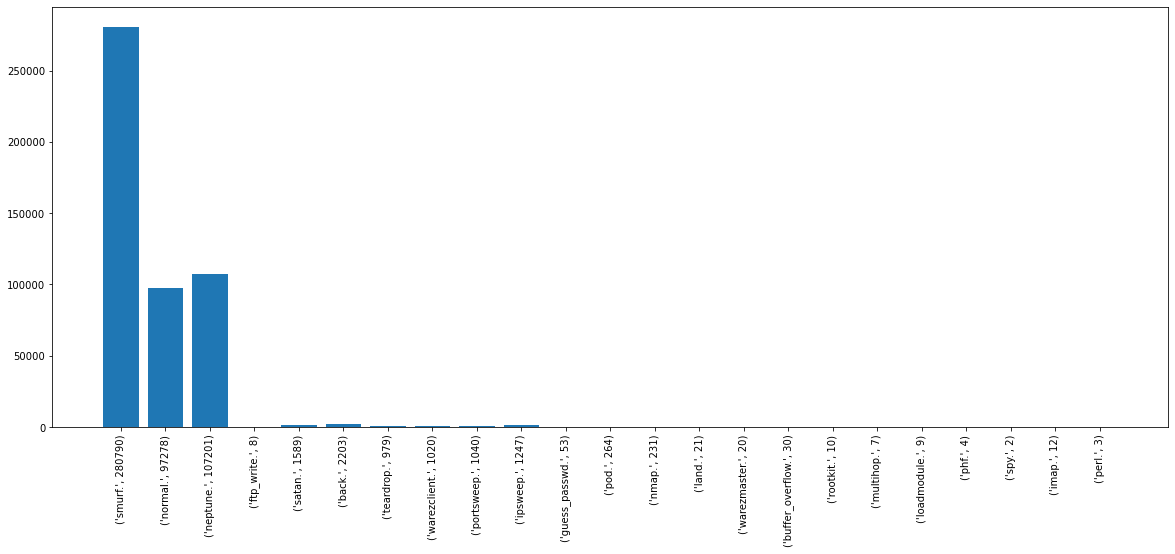

In [10]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(20,8))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [11]:
targetDummies = pd.get_dummies(target)
targetFull = targetDummies
targetFull.head()

,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,...,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
target[target != 'normal.'] = 1.0
target[target == 'normal.'] = 0.0
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: object

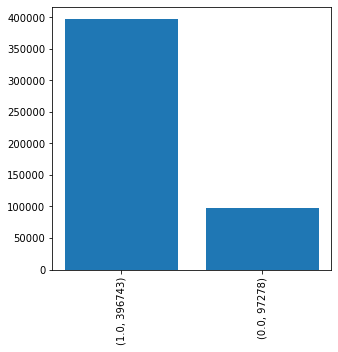

In [13]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(5,5))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [14]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test =train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [15]:
# standardize the data
# turn off the error message, we're not setting indivdual values.
pd.options.mode.chained_assignment = None

toStandardize = ['src_bytes', 'dst_bytes', 'count', 'srv_count',
                 'dst_host_count', 'dst_host_srv_count']
stdscaler = preprocessing.MinMaxScaler().fit(X_train[toStandardize])
X_train[toStandardize] = stdscaler.transform(X_train[toStandardize])
X_test[toStandardize]  = stdscaler.transform(X_test[toStandardize])

X_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,0,0,0,...,0.494118,1.0,1.0,0.0,0.01,0.03,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0


### Logistic Regression Model on the KDD Cup 1999 dataset

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=1, input_shape=[X_train.shape[1]], 
                activation='sigmoid', W_regularizer=l2(0.001)))

# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=[118], activation="sigmoid", units=1, kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 119       
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model
history = model.fit(X_train.to_numpy(), y_train.to_numpy().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.to_numpy(),y_test.to_numpy().reshape(-1,1)))

C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 247010 samples, validate on 247011 samples
Epoch 1/15
 - 3s - loss: 0.1007 - val_loss: 0.0682
Epoch 2/15
 - 2s - loss: 0.0671 - val_loss: 0.0637
Epoch 3/15
 - 2s - loss: 0.0642 - val_loss: 0.0621
Epoch 4/15
 - 2s - loss: 0.0631 - val_loss: 0.0614
Epoch 5/15
 - 2s - loss: 0.0625 - val_loss: 0.0610
Epoch 6/15
 - 2s - loss: 0.0622 - val_loss: 0.0608
Epoch 7/15
 - 2s - loss: 0.0621 - val_loss: 0.0607
Epoch 8/15
 - 2s - loss: 0.0620 - val_loss: 0.0607
Epoch 9/15
 - 2s - loss: 0.0619 - val_loss: 0.0606
Epoch 10/15
 - 2s - loss: 0.0619 - val_loss: 0.0606
Epoch 11/15
 - 2s - loss: 0.0618 - val_loss: 0.0606
Epoch 12/15
 - 2s - loss: 0.0618 - val_loss: 0.0606
Epoch 13/15
 - 2s - loss: 0.0618 - val_loss: 0.0606
Epoch 14/15
 - 2s - loss: 0.0618 - val_loss: 0.0606
Epoch 15/15
 - 2s - loss: 0.0618 - val_loss: 0.0606


Loss after final iteration:  0.06059094521097026


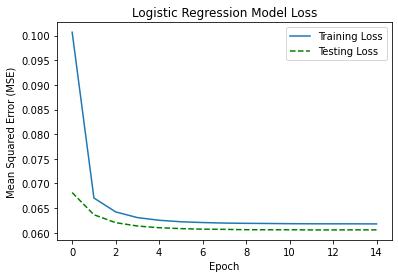

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

In [21]:
predictions = (pd.DataFrame(model.predict(X_test.to_numpy())))

M11= predictions.to_numpy()

predictions[M11 > (0.5)] = 'normal'
predictions[M11 <= (0.5)] = 'anamoly'

My11=y_test.to_numpy().reshape(-1,1).copy()

y_test_labels = y_test.to_numpy().reshape(-1,1).copy()
y_test_labels[My11 > 0.5] = 'normal'
y_test_labels[My11 <= 0.5] = 'anamoly'

print('accuracy', accuracy_score(predictions,y_test_labels))
print('confusion matrix\n', confusion_matrix(predictions,y_test_labels))

print(classification_report(predictions,y_test_labels))

accuracy 0.9911704337053815
confusion matrix
 [[ 48386   1557]
 [   624 196444]]
              precision    recall  f1-score   support

     anamoly       0.99      0.97      0.98     49943
      normal       0.99      1.00      0.99    197068

    accuracy                           0.99    247011
   macro avg       0.99      0.98      0.99    247011
weighted avg       0.99      0.99      0.99    247011



### MLP Model on the KDD Cup 1999 dataset

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=4, input_shape=[X_train.shape[1]], 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=2, 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=1,
                activation='sigmoid', W_regularizer=l2(0.001)))
# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=[118], activation="relu", units=4, kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_regularizer=<keras.reg...)`
  del sys.path[0]
C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app


In [23]:
# Fit the model
history = model.fit(X_train.to_numpy(), y_train.to_numpy().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.to_numpy(),y_test.to_numpy().reshape(-1,1)))

C:\Users\EsraaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 247010 samples, validate on 247011 samples
Epoch 1/15
 - 3s - loss: 0.2406 - val_loss: 0.0723
Epoch 2/15
 - 3s - loss: 0.0588 - val_loss: 0.0515
Epoch 3/15
 - 2s - loss: 0.0510 - val_loss: 0.0480
Epoch 4/15
 - 2s - loss: 0.0488 - val_loss: 0.0464
Epoch 5/15
 - 2s - loss: 0.0477 - val_loss: 0.0455
Epoch 6/15
 - 2s - loss: 0.0458 - val_loss: 0.0436
Epoch 7/15
 - 3s - loss: 0.0446 - val_loss: 0.0431
Epoch 8/15
 - 3s - loss: 0.0514 - val_loss: 0.0529
Epoch 9/15
 - 2s - loss: 0.0508 - val_loss: 0.0372
Epoch 10/15
 - 2s - loss: 0.0341 - val_loss: 0.0323
Epoch 11/15
 - 2s - loss: 0.0314 - val_loss: 0.0302
Epoch 12/15
 - 2s - loss: 0.0299 - val_loss: 0.0289
Epoch 13/15
 - 3s - loss: 0.0288 - val_loss: 0.0281
Epoch 14/15
 - 3s - loss: 0.0282 - val_loss: 0.0276
Epoch 15/15
 - 3s - loss: 0.0278 - val_loss: 0.0273


Loss after final iteration:  0.027291857510241446


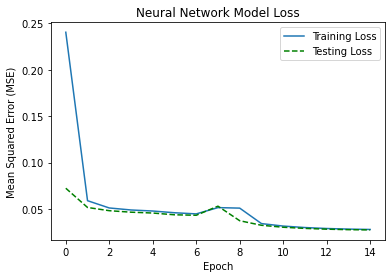

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Neural Network Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

In [25]:
predictions = pd.DataFrame(model.predict(X_test.to_numpy()))

#print(predictions)

#print(type(predictions))
M1= predictions.to_numpy()



predictions[M1 > 0.5] = 'normal'
predictions[M1 <= 0.5] = 'anamoly'

#print(predictions)

My12=y_test.to_numpy().reshape(-1,1).copy()

#y_test_labels = y_test.to_numpy().reshape(-1,1).copy()
y_test_labels[My12 > 0.5] = 'normal'
y_test_labels[My12 <= 0.5] = 'anamoly'


print()
print('accuracy', accuracy_score(predictions,y_test_labels))
print('confusion matrix\n', confusion_matrix(predictions,y_test_labels))

print(classification_report(predictions,y_test_labels))


accuracy 0.9964819380513419
confusion matrix
 [[ 48681    540]
 [   329 197461]]
              precision    recall  f1-score   support

     anamoly       0.99      0.99      0.99     49221
      normal       1.00      1.00      1.00    197790

    accuracy                           1.00    247011
   macro avg       1.00      0.99      0.99    247011
weighted avg       1.00      1.00      1.00    247011

